<a href="https://colab.research.google.com/github/MargaretaDiacenco/LABS-AI/blob/main/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[[ 74397.68340315]
 [275850.27490625]
 [129095.04314162]
 ...
 [379584.8300749 ]
 [309910.49057885]
 [272408.38744228]]
stat=0.889, p=0.000
Probably dependent
stat=1.004, p=0.345
Probably the same distribution
stat=0.172, p=0.843
Probably the same distribution
Predicted value [[288273.5737479]]


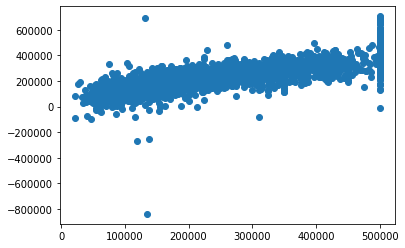

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import kendalltau
from scipy.stats import ttest_rel
from scipy.stats import f_oneway
import sklearn.metrics as sm
from sklearn.metrics import r2_score
from scipy.stats import pearsonr, chi2_contingency, ttest_ind





df = pd.read_csv('apartmentComplexData.txt')
df.to_csv('apartmentComplexData.csv', index=None)

df.columns = ['col1', 'col2', 'complexAge', 'totalRooms', 'totalBedrooms', 'complexInhabitants', 'apartmentsNr', 'col8', 'medianComplexValue']
#df.head()

#plt.figure()
#sns.heatmap(df.corr(), cmap='coolwarm')
#plt.show()

df['complexAge'] = df['complexAge'].fillna(df['complexAge'].mean())
df['totalRooms'] = df['totalRooms'].fillna(df['totalRooms'].mean())
df['totalBedrooms'] = df['totalBedrooms'].fillna(df['totalBedrooms'].mean())
df['complexInhabitants'] = df['complexInhabitants'].fillna(df['complexInhabitants'].mean())
df['apartmentsNr'] = df['apartmentsNr'].fillna(df['apartmentsNr'].mean())
df['medianComplexValue'] = df['medianComplexValue'].fillna(df['medianComplexValue'].mean())

X = df[['col1', 'col2', 'complexAge', 'totalRooms', 'totalBedrooms', 'complexInhabitants', 'apartmentsNr', 'col8']].values
Y = df[['medianComplexValue']].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 20)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

Y_pred = regressor.predict(X_test)
print(Y_pred)
plt.scatter(y_test, Y_pred)

# Example of the Kendall's Rank Correlation Test
data1 = [-122.250000,37.850000,52.000000,1627.000000,280.000000,565.000000,259.000000,3.846200,342200.000000]
data2 = [-122.160000,37.690000,36.000000,1118.000000,219.000000,625.000000,228.000000,3.781300,192200.000000]
stat, p = kendalltau(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

# Example of the Paired Student's t-test
data1 = [-122.250000,37.850000,52.000000,1627.000000,280.000000,565.000000,259.000000,3.846200,342200.000000]
data2 = [-122.160000,37.690000,36.000000,1118.000000,219.000000,625.000000,228.000000,3.781300,192200.000000]
stat, p = ttest_rel(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')
 
 
# Example of the Analysis of Variance Test
data1 = [-122.250000,37.850000,52.000000,1627.000000,280.000000,565.000000,259.000000,3.846200,342200.000000]
data2 = [-122.160000,37.690000,36.000000,1118.000000,219.000000,625.000000,228.000000,3.781300,192200.000000]
data3 = [-122.030000,37.970000,45.000000,1613.000000,338.000000,865.000000,336.000000,3.250000,151100.000000]
stat, p = f_oneway(data1, data2, data3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

inputs = [[-122.130000,37.780000,54.000000,1284.000000,587.000000,751.000000,472.000000,3.640000]]
prediction = regressor.predict(inputs)

print("Predicted value", prediction)
